In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing dataset

data = pd.read_csv("C:/Users/TRANSFORMER/Desktop/Favorites/Downloads/Credit-Card-Dataset (1)/Credit-card-dataset/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
(data == 0).astype(int).sum(axis=0)

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

In [7]:
corr = data.corr()

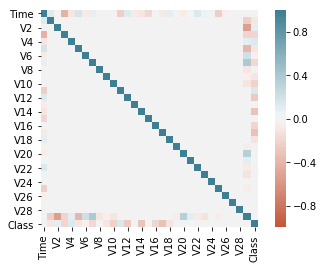

In [8]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [46]:
print(corr)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.12

### Splitting the dataset in X and Y so as to further feed the datasets for feature engineering
### We shall complete the feature engineering exercise using feature based, wrapper based and embedded methods. chi-squared = filter based, Recursive Feature Elimination = Wrapper based, Lasso and Random forest = Embedded

In [45]:
Y_data = data.loc[:,['Class']]

In [11]:
Y_data.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [14]:
X_data = data.iloc[:,1:30]

In [15]:
X_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
X_norm = MinMaxScaler().fit_transform(X_data)

In [21]:
print(X_norm)

[[9.35192337e-01 7.66490419e-01 8.81364903e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [9.78541955e-01 7.70066651e-01 8.40298490e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [9.35217023e-01 7.53117667e-01 8.68140819e-01 ... 4.15489266e-01
  3.11911316e-01 1.47389219e-02]
 ...
 [9.90904812e-01 7.64079694e-01 7.81101998e-01 ... 4.16593177e-01
  3.12584864e-01 2.64215395e-03]
 [9.54208999e-01 7.72855742e-01 8.49587129e-01 ... 4.18519535e-01
  3.15245157e-01 3.89238944e-04]
 [9.49231759e-01 7.65256401e-01 8.49601462e-01 ... 4.16466371e-01
  3.13400843e-01 8.44648509e-03]]


In [32]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, Y_data)
rfe_support = rfe_selector.get_support()
rfe_feature = X_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 29 features.


C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20 selected features


In [25]:
print(rfe_feature)

['V2', 'V4', 'V5', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V20', 'V21', 'V22']


In [33]:
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, Y_data)
chi_support = chi_selector.get_support()
chi_feature = X_data.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [34]:
print(chi_feature)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V24', 'V26', 'Amount']


In [43]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=2)
embeded_lr_selector.fit(X_norm, Y_data)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_data.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15 selected features


In [41]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=29)
embeded_rf_selector.fit(X_data, Y_data)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_data.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

C:\Users\TRANSFORMER\Anaconda3n\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


7 selected features


In [42]:
print(embeded_rf_feature)

['V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [44]:
print(embeded_lr_feature)

['V1', 'V3', 'V4', 'V5', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V19', 'V21', 'V22', 'V24']
